In [183]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sweetviz as vs

ModuleNotFoundError: No module named 'sweetviz'

In [ ]:
df_compl = pd.read_csv("Lending Club/loans_2007.csv")

In [ ]:
my_report = sv.analyze(df)
my_report.show_html() # Default arguments will generate to "SWEETVIZ_REPORT.html"

In [184]:
df["loan_status"].nunique()

KeyError: 'loan_status'

In [ ]:
df["loan_status"].value_counts()

In [ ]:
df.isnull().sum()

In [ ]:
df.info()

In [ ]:
print(df.corr().shape)
fig= plt.figure(figsize=(20,20))
sns.heatmap(df.corr())

In [ ]:
####################################### Data cleaning
# emp_legth,home_ownership verdummien
# interaktionterm von annual income und verifications_status
# untersuchen ob zwischen 2007 und 2009 kreditausfälle stattgefunden haben durch die krise, varibale issue_d untersuchen
# loan_status zu einer neuen kategorievariable machen mit : 0 = gezahlt, 1= ausstehend, 2= nicht in der lage
# die, die wir rausgeschmissen haben, haben wir entweder nicht verstanden oder waren unbalancierte variablen 
# emp_length verdummien, da ca. 1100 fehlen


columns_delete=["id", "member_id", "grade", "emp_title","pymnt_plan","title","zip_code", "addr_state","delinq_2yrs","earliest_cr_line","inq_last_6mths","pub_rec","revol_util","total_acc","initial_list_status","out_prncp","out_prncp_inv","total_pymnt","total_pymnt_inv","total_rec_int","last_pymnt_amnt","last_pymnt_d","total_rec_late_fee","last_credit_pull_d","collections_12_mths_ex_med","policy_code","application_type","acc_now_delinq","chargeoff_within_12_mths","delinq_amnt","tax_liens"]

y_colmuns=["loan_status","sub_grade"]

In [ ]:
# wir elimierniern drei übeltäter die voll mit nans sind in der zeile
rows_delete=df[df["loan_amnt"].isnull()].index

df= df.drop(rows_delete, axis=0)

In [ ]:
#spalten löschen
df= df_compl.drop(columns_delete, axis=1).drop(y_colmuns, axis=1)

In [186]:
# hier werden die fehlenden daten durch wahrscheinliche daten ersetzt (mean,median,blaa)

df["open_acc"].fillna(df["open_acc"].median(),inplace=True)
df["annual_inc"].fillna(df["annual_inc"].median().round(2),inplace=True)
df["emp_length"].fillna("no info at all", inplace=True)
df["pub_rec_bankruptcies"].fillna(0.0, inplace=True)



In [211]:
df.corrwith(df["open_acc"])

loan_amnt                  0.176513
funded_amnt                0.174692
funded_amnt_inv            0.156344
term                       0.045604
int_rate                   0.024668
installment                0.175336
annual_inc                 0.168078
dti                        0.297877
open_acc                   1.000000
revol_bal                  0.257767
total_rec_prncp            0.157345
recoveries                 0.016531
collection_recovery_fee    0.005770
pub_rec_bankruptcies       0.009570
dtype: float64

In [195]:
#### Hier werden die dateintypen, welche falsch sind korrigiert
df["int_rate"]=df["int_rate"].str.strip("%").astype("float")
df["term"]=df["term"].str.strip("months").astype("float")


AttributeError: Can only use .str accessor with string values!

In [198]:
df["term"]=df["term"].str.strip("months").astype("float")

In [196]:
#### hier wird eine dateityp zum zeitdatentyp geändert
df["issue_d"]= pd.to_datetime(df["issue_d"])

36.0    31534
60.0    11001
Name: term, dtype: int64

0       2011-12-01
1       2011-12-01
2       2011-12-01
3       2011-12-01
4       2011-12-01
           ...    
42531   2007-06-01
42532   2007-06-01
42533   2007-06-01
42534   2007-06-01
42535   2007-06-01
Name: issue_d, Length: 42535, dtype: datetime64[ns]

In [203]:
### hier werden dummies erstellt

df_dummie=pd.get_dummies(df, drop_first=True)




<class 'pandas.core.frame.DataFrame'>
Int64Index: 42535 entries, 0 to 42535
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   loan_amnt                42535 non-null  float64       
 1   funded_amnt              42535 non-null  float64       
 2   funded_amnt_inv          42535 non-null  float64       
 3   term                     42535 non-null  float64       
 4   int_rate                 42535 non-null  float64       
 5   installment              42535 non-null  float64       
 6   emp_length               42535 non-null  object        
 7   home_ownership           42535 non-null  object        
 8   annual_inc               42535 non-null  float64       
 9   verification_status      42535 non-null  object        
 10  issue_d                  42535 non-null  datetime64[ns]
 11  purpose                  42535 non-null  object        
 12  dti                      42535 n

(14, 14)


<AxesSubplot:>

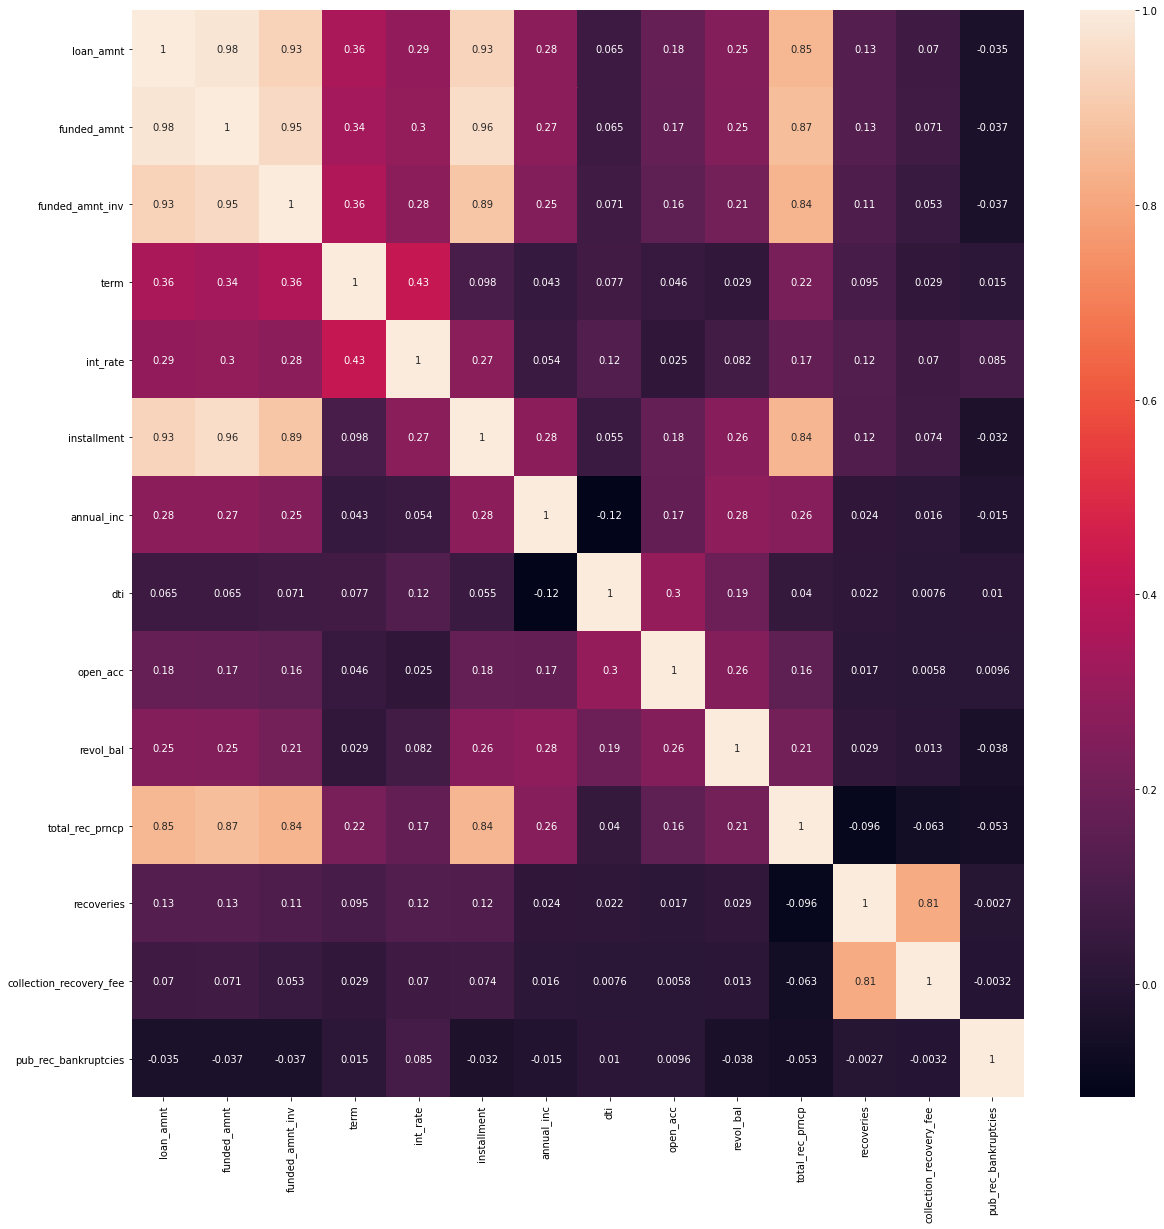

In [213]:
print(df.corr().shape)
fig= plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)



(42535, 19)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42535 entries, 0 to 42535
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   loan_amnt                42535 non-null  float64       
 1   funded_amnt              42535 non-null  float64       
 2   funded_amnt_inv          42535 non-null  float64       
 3   term                     42535 non-null  float64       
 4   int_rate                 42535 non-null  float64       
 5   installment              42535 non-null  float64       
 6   emp_length               42535 non-null  object        
 7   home_ownership           42535 non-null  object        
 8   annual_inc               42535 non-null  float64       
 9   verification_status      42535 non-null  object        
 10  issue_d                  42535 non-null  datetime64[ns]
 11  purpose                  42535 non-null  object        
 12  dti                      42535 n